In [1]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

def figure3d(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, subplot_kw={"projection": "3d"}, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [10]:
from ipywidgets import FloatSlider, HBox
from scipy.integrate import trapz


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
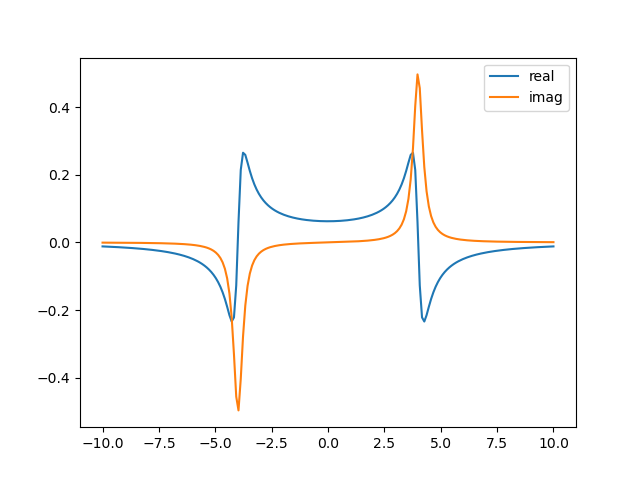

In [5]:
def get_slider():
    w0s = FloatSlider(description='w0: ',
        value=4, min=0, max=10, step = 0.1
    )
    gas = FloatSlider(description='g: ',
        value=.5, min=0, max=10, step = 0.1
    )
    w = np.linspace(-10, 10, 200)
    w0 = w0s.value
    ga = gas.value
    chi = 1/(w0**2 - w**2 - 1j*ga*w)    
    fig, ax = figure('s1')
    lines = []
    lines.append(ax.plot(w, chi.real, label='real')[0])
    lines.append(ax.plot(w, chi.imag, label='imag')[0])
    ax.legend()    
    
    def redraw(change):
        w0 = w0s.value
        ga = gas.value
        chi = 1/(w0**2 - w**2 - 1j*ga*w)    
        lines[0].set_data(w, chi.real)
        lines[1].set_data(w, chi.imag)
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    gas.observe(redraw, names='value')
    w0s.observe(redraw, names='value')
    return HBox([w0s, gas])

get_slider()

In [8]:
def re2im(re, w):
    func = re / (ws**2 - w**2)
    func[np.isinf(func)] = 0
    func[np.isnan(func)] = 0
    im =  -2/np.pi * w * trapz(func, ws)
    return im

def im2re(im, w):
    func = ws * im / (ws**2 - w**2)
    func[np.isinf(func)] = 0
    func[np.isnan(func)] = 0
    re =  2/np.pi * trapz(func, ws)
    return re

/tmp/ipykernel_10532/2868952864.py:9: RuntimeWarning: invalid value encountered in true_divide
  func = ws * im / (ws**2 - w**2)
/tmp/ipykernel_10532/2868952864.py:9: RuntimeWarning: divide by zero encountered in true_divide
  func = ws * im / (ws**2 - w**2)


(0.0, 7.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
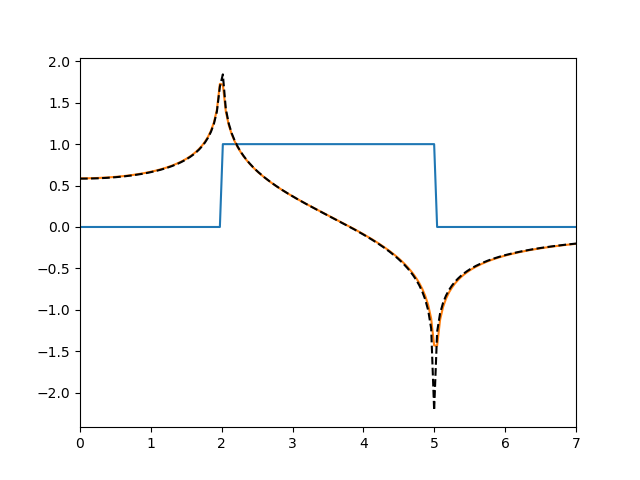

In [11]:
figure(2)

wm = 2
wp = 5
ws = np.linspace(0, 21, 501)

chi2 = np.zeros(len(ws))
dom = np.logical_and(ws > wm, ws < wp)
chi2[dom] = 1

re2 = [im2re(chi2, w) for w in ws]
re_ana = np.zeros(len(ws))
re_ana = 1/np.pi * np.log(abs((wp**2 - ws**2)/(wm**2 - ws**2)))

plt.plot(ws, chi2)
plt.plot(ws, re2)
plt.plot(ws, re_ana, 'k--')
plt.xlim([0, 7])